# Anomaly Detection and Classification using the BETH Cybersecurity Dataset
#### SENG 474 - Data Mining   

**Contributers:**  
*AbdulAziz AlChammat  
Cindy Unrau  
Salem Ait Ami*

## Purpose

The purpose of this report is to compare and evaluate different data mining models for anomaly detection on the BETH dataset, a real cybersecurity dataset. By examining the performance and effectiveness of various models, this study aims to provide insights into the most suitable data mining approaches for detecting anomalies in cybersecurity data, thereby enhancing the overall security and resilience of systems. [2] 

## Methodology
### Dataset

The BETH dataset was chosen for a few reasons. 

#### 1 - Real-world cybersecurity data  
This data, which represents over 8 million events collected using a honeypot tracking system of 23 honeypots [2], should generate results that are more applicable to real world applications, providing a more accurate representation of the challenges and complexities faced in cybersecurity.

#### 2 - Anomaly detection focus
The BETH dataset is specifically designed for anomaly detection tasks in the cybersecurity domain. Anomaly detection is a critical aspect of cybersecurity [1] as it helps identify and mitigate potential threats, intrusions, or unusual activities that may indicate malicious behavior. By using the BETH dataset, we can directly assess the effectiveness of data mining models in detecting anomalies in this context.

#### 3 - Availability and Accessibility
The availability and accessibility of the BETH dataset are crucial factors in its selection. A dataset that is easily accessible allows others to replicate experiments, conduct comparative studies, and facilitate knowledge sharing within the cybersecurity community.

By selecting the BETH dataset, researchers can focus their analysis and evaluations on anomaly detection techniques specifically tailored to cybersecurity scenarios, leading to insights and findings that have direct implications for improving security measures and detecting potential threats.

The dataset can be found here: https://www.kaggle.com/datasets/katehighnam/beth-dataset

### Preprocessing

Preprocessing the data, included removing irrelevant features and converting process IDs. A lot of the heavy preprocessing had already been done, such as removing missing values and labelling instances.

### Processing
The data processing methodology consisted of the following steps:

#### 1 - Comparing Models
Initially, several default models were employed, including Linear SVC, Decision Tree, Random Forest, and SGD (Stochastic Gradient Descent). These models were chosen due to their popularity and widespread use in data mining and machine learning tasks. Each model was trained and evaluated using the BETH dataset to establish baseline performance.

#### 2 - Fine Tuning 
After testing the default models, the next step involved fine-tuning the best model, which happened to be the Decision Tree Classifier. Fine-tuning involved adjusting the test set size, maximum depth, and splitting criterion. By fine-tuning the models, we aimed to improve their performance and tailor them specifically to the characteristics of the BETH dataset.

#### 3 - Evaluating Model on Different Sensor Logs
To gain deeper insights into the models' performance, they were compared on different subsets of the data. This comparison involved evaluating the models on specific types of sensor logs, kernel-level process calls and network traffic.


## Results

The decision tree classifier, after careful model selection, fine-tuning, and consolidation of sensor logs, demonstrated outstanding performance with a precision of 98.5% on the 'suspicious' label, 99.1% on the 'evil' label, a recall of 98.7% on the 'suspicious' label, 99.7% on the 'evil' label, and impressive f-scores of 98.6% and 99.4% respectively. These findings provide valuable insights for anomaly detection in cybersecurity using the BETH dataset and lay a solid foundation for enhancing security measures to detect and mitigate potential threats effectively.

# Setup

## Library import
import all the required python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Data Mining Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_recall_fscore_support, multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 

# Other Tools
import warnings 
from tqdm.notebook import tqdm

## Settings

In [2]:
warnings.filterwarnings('ignore')
bar_format = '{desc}: {percentage:3.0f}% |{bar}| {n_fmt}/{total_fmt}' 

colours = ["#0a9396","#E85D75"]
sns.set_palette(sns.color_palette(colours, as_cmap=True))

## Parameter definition

In [3]:
SEED = 42

# Data import

In [4]:
data_testing = pd.read_csv('data/labelled_testing_data.csv',sep=',')
data_training = pd.read_csv('data/labelled_training_data.csv',sep=',')
data_validation = pd.read_csv('data/labelled_validation_data.csv',sep=',')

data = pd.concat([data_testing,data_training,data_validation])
data.shape

(1141078, 16)

In [5]:
data.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [6]:
data_105 = pd.read_csv('data/labelled_2021may-ip-10-100-1-105.csv',sep=',')
data_186 = pd.read_csv('data/labelled_2021may-ip-10-100-1-186.csv',sep=',')
data_26 = pd.read_csv('data/labelled_2021may-ip-10-100-1-26.csv',sep=',')
data_4 = pd.read_csv('data/labelled_2021may-ip-10-100-1-4.csv',sep=',')
data_95 = pd.read_csv('data/labelled_2021may-ip-10-100-1-95.csv',sep=',')

data_ip = pd.concat([data_105,data_186,data_26,data_4,data_95])
data_ip.shape

(2466896, 13)

In [7]:
data_ip.head()

,timestamp,processId,parentProcessId,userId,processName,hostName,eventId,eventName,argsNum,returnValue,args,sus,evil
0,126.233491,1,0,0,systemd,ip-10-100-1-105,1005,security_file_open,4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
1,126.233165,384,1,101,systemd-resolve,ip-10-100-1-105,41,socket,3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,126.233559,1,0,0,systemd,ip-10-100-1-105,5,fstat,2,0,"[{'name': 'fd', 'type': 'int', 'value': 18}, {...",0,0
3,126.233681,1,0,0,systemd,ip-10-100-1-105,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 18}]",0,0
4,126.233796,384,1,101,systemd-resolve,ip-10-100-1-105,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0


In [8]:
data_105_dns = pd.read_csv('data/labelled_2021may-ip-10-100-1-105-dns.csv',sep=',')
data_186_dns = pd.read_csv('data/labelled_2021may-ip-10-100-1-186-dns.csv',sep=',')
data_26_dns = pd.read_csv('data/labelled_2021may-ip-10-100-1-26-dns.csv',sep=',')
data_4_dns = pd.read_csv('data/labelled_2021may-ip-10-100-1-4-dns.csv',sep=',')
data_95_dns = pd.read_csv('data/labelled_2021may-ip-10-100-1-95-dns.csv',sep=',')

data_dns = pd.concat([data_105,data_186,data_26,data_4,data_95])
data_dns.shape

(2466896, 13)

In [9]:
data_dns.head()

,timestamp,processId,parentProcessId,userId,processName,hostName,eventId,eventName,argsNum,returnValue,args,sus,evil
0,126.233491,1,0,0,systemd,ip-10-100-1-105,1005,security_file_open,4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
1,126.233165,384,1,101,systemd-resolve,ip-10-100-1-105,41,socket,3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,126.233559,1,0,0,systemd,ip-10-100-1-105,5,fstat,2,0,"[{'name': 'fd', 'type': 'int', 'value': 18}, {...",0,0
3,126.233681,1,0,0,systemd,ip-10-100-1-105,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 18}]",0,0
4,126.233796,384,1,101,systemd-resolve,ip-10-100-1-105,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0


# Data preprocessing

In [10]:
# Drop irrelevant features
data.drop(['timestamp', 'threadId', 'parentProcessId', 'eventName', 'stackAddresses'], axis=1, inplace=True)
data_ip.drop(['timestamp', 'parentProcessId', 'eventName'], axis=1, inplace=True)
data_dns.drop(['timestamp', 'parentProcessId', 'eventName'], axis=1, inplace=True)

In [11]:
data_ip.head()

,processId,userId,processName,hostName,eventId,argsNum,returnValue,args,sus,evil
0,1,0,systemd,ip-10-100-1-105,1005,4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
1,384,101,systemd-resolve,ip-10-100-1-105,41,3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,1,0,systemd,ip-10-100-1-105,5,2,0,"[{'name': 'fd', 'type': 'int', 'value': 18}, {...",0,0
3,1,0,systemd,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 18}]",0,0
4,384,101,systemd-resolve,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0


In [12]:
# Replaces processId with a binary variable indicating whether processId is 0, 1, or 2
data['processId'] = data['processId'].apply(lambda x: int(x in [0, 1, 2]))
data_ip['processId'] = data_ip['processId'].apply(lambda x: int(x in [0, 1, 2]))
data_dns['processId'] = data_dns['processId'].apply(lambda x: int(x in [0, 1, 2]))

In [13]:
data_ip.head()

,processId,userId,processName,hostName,eventId,argsNum,returnValue,args,sus,evil
0,1,0,systemd,ip-10-100-1-105,1005,4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
1,0,101,systemd-resolve,ip-10-100-1-105,41,3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,1,0,systemd,ip-10-100-1-105,5,2,0,"[{'name': 'fd', 'type': 'int', 'value': 18}, {...",0,0
3,1,0,systemd,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 18}]",0,0
4,0,101,systemd-resolve,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0


ProcessIDs 0, 1, and 2 are meaningful since these are always values used by the OS. Otherwise a random number is assigned to the process upon creation so no insights are gained from knowing individual process IDs. For training our model, we only care about wether or not a process was spawned by the OS or not. A binary variable is perfect for this as it'll set processIDs spawned from the OS to 1 and anything else to 0.

In [14]:
# Creates a binary variable to indicate userId < 1000 or userId ≥ 1000
data['userId'] = data['userId'].apply(lambda x: int(x < 1000))
data_ip['userId'] = data_ip['userId'].apply(lambda x: int(x < 1000))
data_dns['userId'] = data_dns['userId'].apply(lambda x: int(x < 1000))
data_ip.head()

,processId,userId,processName,hostName,eventId,argsNum,returnValue,args,sus,evil
0,1,1,systemd,ip-10-100-1-105,1005,4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
1,0,1,systemd-resolve,ip-10-100-1-105,41,3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,1,1,systemd,ip-10-100-1-105,5,2,0,"[{'name': 'fd', 'type': 'int', 'value': 18}, {...",0,0
3,1,1,systemd,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 18}]",0,0
4,0,1,systemd-resolve,ip-10-100-1-105,3,1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0


Similarly to processId, the default in Linux systems is to assign OS activity to a number below 1000 (typically 0). As users login, they are assigned IDs starting at 1000, incrementally. This can be altered manually by a user, but none of the logs showed any evidence of an attacker attempting this. Just like processId, we use a binary variable on userID to set OS activity to 1 and anything else to 0. 

**Note: may need to swap inequality to keep results consistent with processId**

In [15]:
# Create a binary variable to indicate whether mountNamespace = 4026531840
data['mountNamespace'] = data['mountNamespace'].apply(lambda x: int(x == 4026531840))

This feature determines the access a certain process has to various mount points. The most common value for this feature is 0xF0000000, which is for the directory where all manually mounted points are linked. All logs with userID >= 1000 had a mountNamespace of 0xF0000000 while some OS traffic used different mountNamespace values. Just like the last two features we used a binary variable to map whether or not mountNamespace = 0xF0000000.

In [16]:
# Maps returnValue into three values: -1 for negative values, 0 for zero, and 1 for positive values
returnValue_mapping = {-1: -1, 0: 0}
data['returnValue'] = data['returnValue'].map(returnValue_mapping).fillna(1)
data_ip['returnValue'] = data_ip['returnValue'].map(returnValue_mapping).fillna(1)
data_dns['returnValue'] = data_dns['returnValue'].map(returnValue_mapping).fillna(1)

This is also called the exit status and can be used to determine whether a call completed successfully or not. Mappings for this can vary, as this value is decided between the parent and child process. We mapped 'returnValue' into three values based on the common usage of the field: -1 when negative (bad errors), 0 when zero (success), and 1 when positive (success and signalling something to the parent process)

In [17]:
# Count the missing values in each column
len(data.index) - data.count()

processId         0
userId            0
mountNamespace    0
processName       0
hostName          0
eventId           0
argsNum           0
returnValue       0
args              0
sus               0
evil              0
dtype: int64

Since the BETH dataset is already lightly preprocessed there are no missing values for us to handle.

In [18]:
# Category counts
print("processName count: ", data['processName'].value_counts().count())
print("hostName count: ", data['hostName'].value_counts().count())
print("eventId count: ", data['eventId'].value_counts().count())

processName count:  260
hostName count:  12
eventId count:  46


In [19]:
# Create pipeline for categorical features  
cat_pipeline = Pipeline([("ordinal", OrdinalEncoder())])
# Creat column transformer
categorical_cols = ['processName', 'hostName', 'eventId']
preprocessing_data = ColumnTransformer([("cat", cat_pipeline, categorical_cols)], remainder="passthrough")
preprocessing_ip = ColumnTransformer([("cat", cat_pipeline, categorical_cols)], remainder="passthrough")
preprocessing_dns = ColumnTransformer([("cat", cat_pipeline, categorical_cols)], remainder="passthrough")

Using a OneHotEncoder could be more optimal in terms of accuracy when compared to an OrdinalEncoder because, with an OrdinalEncoder our machine learning algorithm will assume that nearby values are more similar than distant ones. However, since 'processName', 'hostName', and 'eventId' are composed of over 300 distinct categorgies one hot encoding becomes too computationally expensive

In [20]:
# Drop args and argNums (kept in previous DataFrame for graphing purposes)
data_prepared = data.drop(columns=['args', 'argsNum'])
data_prepared = preprocessing_data.fit_transform(data_prepared)
# IP
ip_prepared = data_ip.drop(columns=['args', 'argsNum'])
ip_prepared = preprocessing_ip.fit_transform(ip_prepared)
# DNS
dns_prepared = data_dns.drop(columns=['args', 'argsNum'])
dns_prepared = preprocessing_dns.fit_transform(dns_prepared)

Args and argsNum dropped because parsing args requires some much more sophisticated pre-processing or a more complex machine learning model

In [21]:
# Convert the result to a dataframe
data_prepared = pd.DataFrame(data_prepared, columns=preprocessing_data.get_feature_names_out())
# IP
ip_prepared = pd.DataFrame(ip_prepared, columns=preprocessing_ip.get_feature_names_out())
# DNS
dns_prepared = pd.DataFrame(dns_prepared, columns=preprocessing_dns.get_feature_names_out())
# Combined 
combined_prepared = pd.concat([data_prepared, ip_prepared, dns_prepared])
# Need to handle missing values for mountNamespace because the column doesn't exist for IP or DNS data (assume user processes (not OS))
combined_prepared = combined_prepared.fillna(1)

# Data visualization

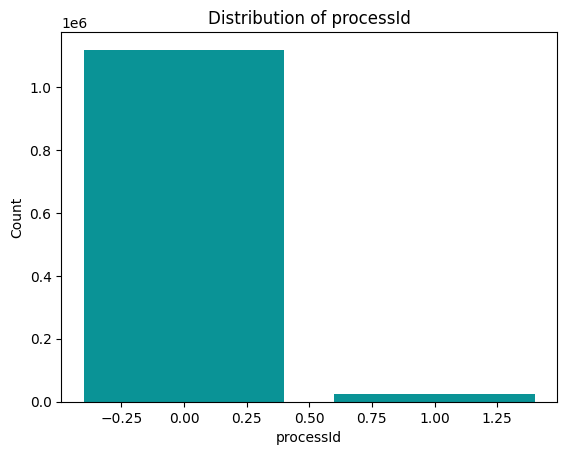

In [22]:
# Bar plot
processId_counts = data['processId'].value_counts()
plt.bar(processId_counts.index, processId_counts.values)
plt.xlabel('processId')
plt.ylabel('Count')
plt.title('Distribution of processId')
plt.show()


- Bar plot: This plot displays the distribution of the 'processId' variable, showing the count for each unique value.oups.


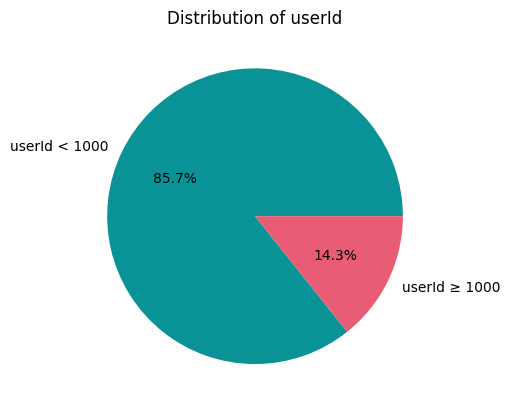

In [23]:
# Pie char
userId_counts = data['userId'].value_counts()
plt.pie(userId_counts.values, labels=['userId < 1000', 'userId ≥ 1000'], autopct='%1.1f%%')
plt.title('Distribution of userId')
plt.show()

- Pie chart: This chart represents the distribution of the 'userId' variable, showing the percentage of values categorized as 'userId < 1000' and 'userId ≥ 1000'.

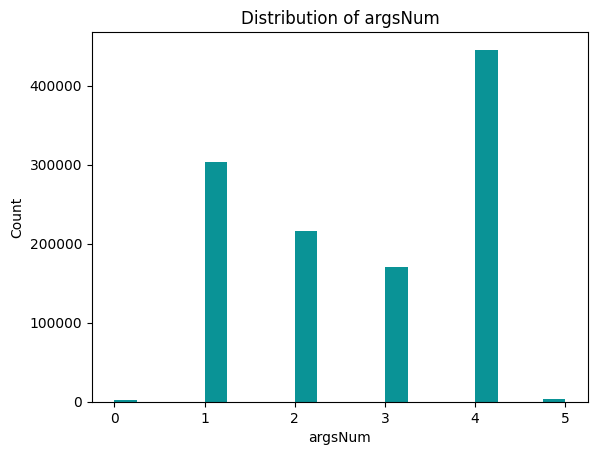

In [24]:
# Histogram
plt.hist(data['argsNum'], bins=20)
plt.xlabel('argsNum')
plt.ylabel('Count')
plt.title('Distribution of argsNum')
plt.show()

- Histogram: This histogram visualizes the distribution of the 'argsNum' variable, dividing it into 20 bins.

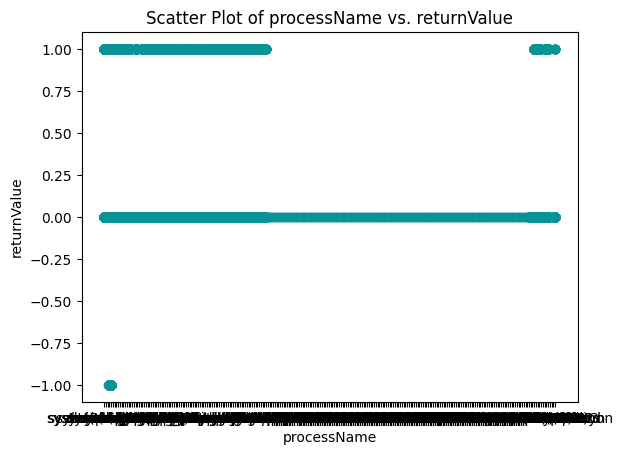

In [25]:
# Scatter plot of processName vs returnValue
plt.scatter(data['processName'], data['returnValue'])
plt.xlabel('processName')
plt.ylabel('returnValue')
plt.title('Scatter Plot of processName vs. returnValue')
plt.show()

- Scatter plot: This scatter plot illustrates the relationship between the 'processName' and 'returnValue' variables.

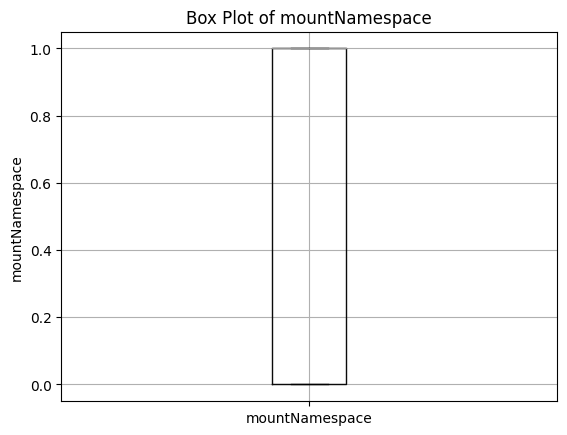

In [26]:
# Box plot of mountNamespace
data.boxplot(column='mountNamespace')
plt.ylabel('mountNamespace')
plt.title('Box Plot of mountNamespace')
plt.show()

- Box plot: This box plot provides an overview of the 'mountNamespace' variable, showing its distribution and any potential outliers.

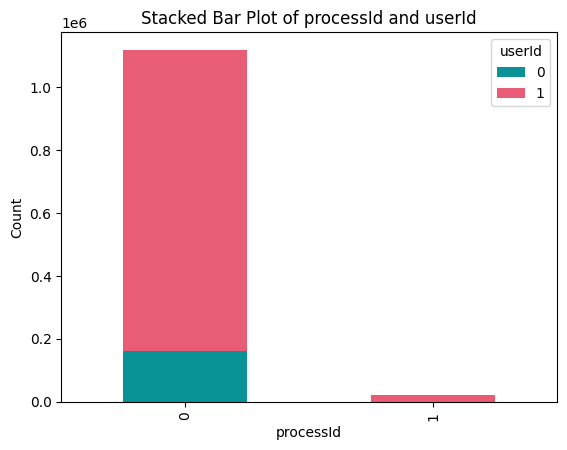

In [27]:
# Stacked bar plot of processID and userID
process_user_counts = data.groupby(['processId', 'userId']).size().unstack()
process_user_counts.plot(kind='bar', stacked=True)
plt.xlabel('processId')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of processId and userId')
plt.legend(title='userId')
plt.show()

- Stacked bar plot: This plot demonstrates the relationship between 'processId' and 'userId' variables, displaying the count for each 'processId' with stacked bars representing different 'userId' categories.

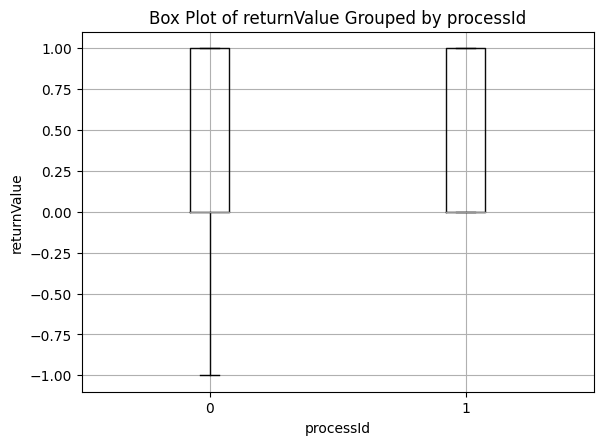

In [28]:
# Box plot of returnValue grouped by processID
data.boxplot(column='returnValue', by='processId')
plt.xlabel('processId')
plt.ylabel('returnValue')
plt.title('Box Plot of returnValue Grouped by processId')
plt.suptitle('')
plt.show()


- Box plot grouped by processId: This box plot shows the distribution of the 'returnValue' variable for each 'processId' value, allowing for comparison between groups.

# Data processing

## Split data

In [29]:
# Prepare data
data_x = data_prepared.drop(columns=['remainder__sus','remainder__evil'])
data_y = data_prepared[['remainder__sus','remainder__evil']].copy()

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, train_size=0.6, random_state=SEED)

# IP
ip_x = ip_prepared.drop(columns=['remainder__sus','remainder__evil'])
ip_y = ip_prepared[['remainder__sus','remainder__evil']].copy()

ip_x_train, ip_x_test, ip_y_train, ip_y_test = train_test_split(ip_x, ip_y, train_size=0.6, random_state=SEED)

# DNS 
dns_x = dns_prepared.drop(columns=['remainder__sus','remainder__evil'])
dns_y = dns_prepared[['remainder__sus','remainder__evil']].copy()
dns_x_train, dns_x_test, dns_y_train, dns_y_test = train_test_split(dns_x, dns_y, train_size=0.6, random_state=SEED)

# Combined
combined_x = combined_prepared.drop(columns=['remainder__sus','remainder__evil'])
combined_y = combined_prepared[['remainder__sus','remainder__evil']].copy()

combined_x_train, combined_x_test, combined_y_train, combined_y_test = train_test_split(combined_x, combined_y, train_size=0.6, random_state=SEED)

Split the data into training and testing sets. The code separates the input features and the target variables. It drops the columns 'remainder__sus' and 'remainder__evil' from the input features and creates a copy of the target variables. Then, it uses the `train_test_split` function to split the data into a 60% training set and a 40% testing set, using the specified random state.


The BETH Dataset already gives us the data split into training, testing, and validation sets, but since these sets were concatenated for preprocessing, we end up with a distribution that differs from the original after using train_test_split(...). If we wanted to preserve the BETH dataset's distribution, we could alternatively preprocess these sets individually instead of concatenating them.

## Evaluate models

Experiments with different models to see which ones can best predict targets for the kernel logs data

In [30]:
def plot_cm(cm):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    
    sns.heatmap(cm[0], annot=True, fmt='g', ax=ax1)
    ax1.set_xlabel('Predicted labels')
    ax1.set_ylabel('Actual labels') 
    ax1.set_title('Suspicious Confusion Matrix') 
    ax1.xaxis.set_ticklabels(['True', 'False']) 
    ax1.yaxis.set_ticklabels(['True', 'False'])
    
    sns.heatmap(cm[1], annot=True, fmt='g', ax=ax2)
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels');
    ax2.set_title('Evil Confusion Matrix') 
    ax2.xaxis.set_ticklabels(['True', 'False'])
    ax2.yaxis.set_ticklabels(['True', 'False'])
    
    plt.show()

def print_scores(precision,recall,f_score):
    print("precision sus:\t %2.4f \tprecision evil:\t %2.4f" % (precision[0],precision[1]))
    print("recall sus:\t %2.4f \trecall evil:\t %2.4f" % (recall[0],recall[1]))
    print("f_score sus:\t %2.4f \tf_score evil:\t %2.4f" % (f_score[0],f_score[1]))

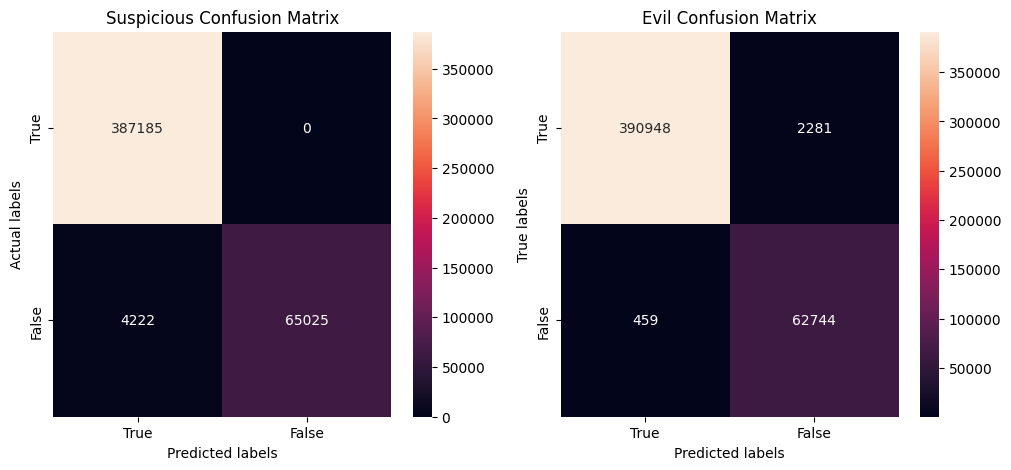

In [31]:
# Support vector classifier 
# Since we have two target variables we have to use a MultiOutputRegressor, which works by fitting one model per target 
svc = MultiOutputClassifier(LinearSVC(random_state=SEED));
svc = svc.fit(data_x_train, data_y_train)

data_y_pred = svc.predict(data_x_test)

cm = multilabel_confusion_matrix(data_y_test, data_y_pred)
plot_cm(cm)

In [32]:
precision, recall, f_score, support = precision_recall_fscore_support(data_y_test, data_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 1.0000 	precision evil:	 0.9649
recall sus:	 0.9390 	recall evil:	 0.9927
f_score sus:	 0.9686 	f_score evil:	 0.9786


Support vector classifier performs quite poorly and takes a long time to compute. One reason might be because it does not calculate outputs simultaneously to take correlations between outputs into account. In other words, if a i point is deemed 'sus' it won't have any influence on whether the  point is classified as 'evil'. 

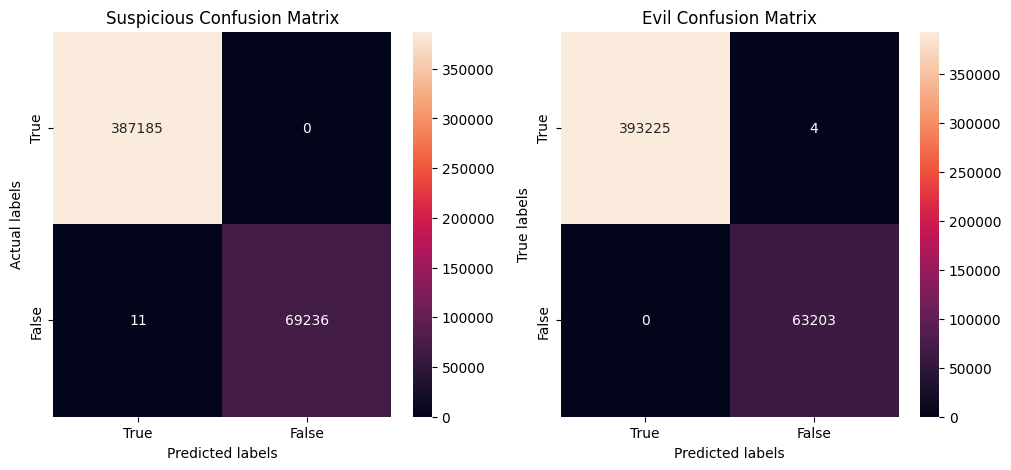

In [33]:
# Decision tree classifier 
tree_clf = DecisionTreeClassifier(random_state=SEED)
tree_clf = tree_clf.fit(data_x_train, data_y_train)

data_y_pred = tree_clf.predict(data_x_test)

cm = multilabel_confusion_matrix(data_y_test, data_y_pred)
plot_cm(cm)

In [34]:
precision, recall, f_score, support = precision_recall_fscore_support(data_y_test, data_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 1.0000 	precision evil:	 0.9999
recall sus:	 0.9998 	recall evil:	 1.0000
f_score sus:	 0.9999 	f_score evil:	 1.0000


Only having 4 'evil' instances missclasified is very good. In contrast to our previous SVC, decision trees are inherently better suited for multi-target classifications since they are able to take correlations between outputs into account.

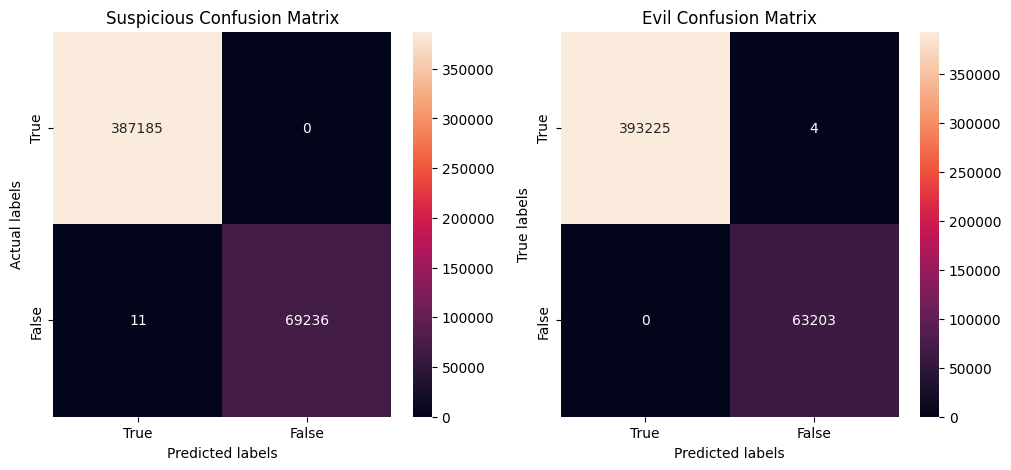

In [35]:
# Random forest classifier 
forest_reg = RandomForestClassifier(random_state=SEED)
tree_clf = tree_clf.fit(data_x_train, data_y_train)

data_y_pred = tree_clf.predict(data_x_test)

cm = multilabel_confusion_matrix(data_y_test, data_y_pred)
plot_cm(cm)

In [36]:
precision, recall, f_score, support = precision_recall_fscore_support(data_y_test, data_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 1.0000 	precision evil:	 0.9999
recall sus:	 0.9998 	recall evil:	 1.0000
f_score sus:	 0.9999 	f_score evil:	 1.0000


There is no significant improvement with random forest when compared to a singular decision tree 

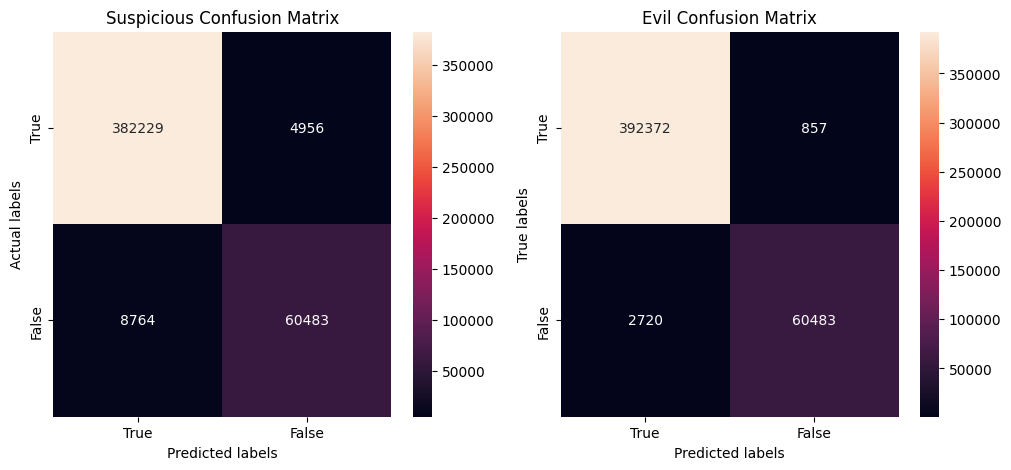

In [37]:
# SGD classifier
sgd_clf = MultiOutputClassifier(SGDClassifier(random_state=SEED))
sgd_clf.fit(data_x_train, data_y_train)

data_y_pred = sgd_clf.predict(data_x_test)

cm = multilabel_confusion_matrix(data_y_test, data_y_pred)
plot_cm(cm)

In [38]:
precision, recall, f_score, support = precision_recall_fscore_support(data_y_test, data_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 0.9243 	precision evil:	 0.9860
recall sus:	 0.8734 	recall evil:	 0.9570
f_score sus:	 0.8981 	f_score evil:	 0.9713


The SGD classifier performs the worst so far

## Fine-tune Model
As the best default model for this dataset was decision trees, we will use that as our base model, and tweak the parameters to get the best possible outcome.

### Training set size

These first tests test training set size, and plot their values along with the corresponding accuracy.

Test Size Progress:   0% |          | 0/8

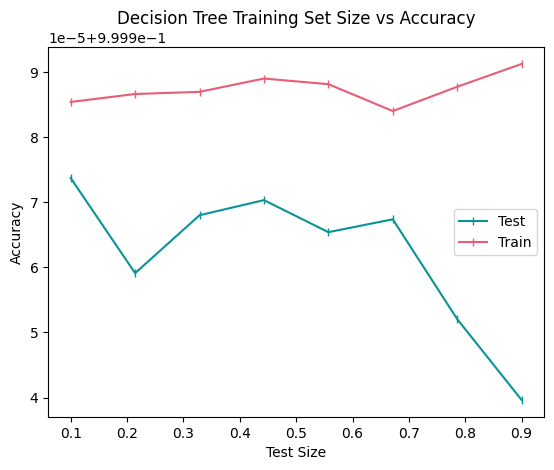

In [39]:
# initialize error lists
t_train_error = list()
t_test_error = list()

# set range of test values
test_sizes = np.linspace(0.1,0.9,num=8)

# run classifier for each test value
for i in tqdm(test_sizes,desc="Test Size Progress",bar_format=bar_format):
    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=i, random_state=SEED)

    clf = DecisionTreeClassifier(random_state=SEED)
    clf = clf.fit(X_train,y_train)

    t_train_error.append(clf.score(X_train,y_train))
    t_test_error.append(clf.score(X_test,y_test))

# plot resulting accuracy 
plt.plot(test_sizes, t_test_error, marker='|', c=colours[0], label="Test")
plt.plot(test_sizes, t_train_error, marker='|', c=colours[1], label = "Train")

plt.title("Decision Tree Training Set Size vs Accuracy")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")

plt.legend(loc="right")
plt.show()


As you can see, we achieve our most optimal accuracy at a test size of around 40%. While training error does have a higher peak after 70%, the corresponding testing error is quite low, which implies overfitting.

In [40]:
optimal_test_size = 0.4

### Maximum Depth

Max Depth Progress:   0% |          | 0/20

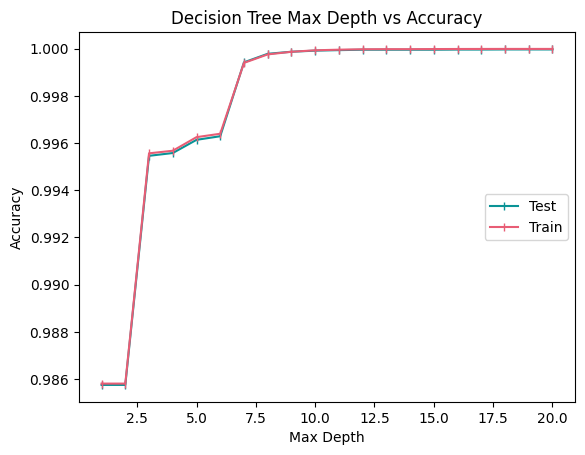

In [41]:
# initialize error lists
md_train_error = list()
md_test_error = list()

# set range of test values
depths = np.arange(1,21)

# run classifier for each test value
for i in tqdm(depths,desc="Max Depth Progress",bar_format=bar_format):
    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=optimal_test_size, shuffle=True, random_state=SEED)

    clf = DecisionTreeClassifier(max_depth=i, random_state=SEED)
    clf = clf.fit(X_train,y_train)

    md_train_error.append(clf.score(X_train,y_train))
    md_test_error.append(clf.score(X_test,y_test))

# plot resulting accuracy 
plt.plot(depths, md_test_error, marker='|', c=colours[0], label="Test")
plt.plot(depths, md_train_error, marker='|', c=colours[1], label = "Train")

plt.title("Decision Tree Max Depth vs Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.legend(loc="right")
plt.show()

As you can see, our accuracy peaks and stabalizes at a max depth of around 10.

In [42]:
optimal_max_depth = 10

### Split Criterion

Criterion Progress:   0% |          | 0/3

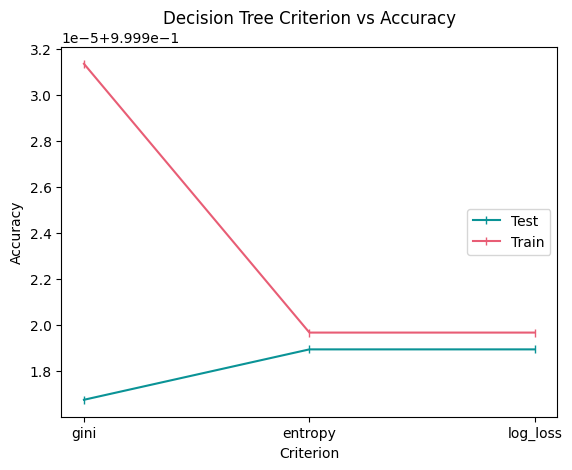

In [43]:
# initialize error lists
c_train_error = list()
c_test_error = list()

# set range of test values
criterion = "gini","entropy","log_loss"

# run classifier for each test value
for i in tqdm(criterion,desc="Criterion Progress",bar_format=bar_format):
    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=optimal_test_size, shuffle=True, random_state=SEED)

    clf = DecisionTreeClassifier(max_depth=optimal_max_depth, criterion=i, random_state=SEED)
    clf = clf.fit(X_train,y_train)

    c_train_error.append(clf.score(X_train,y_train))
    c_test_error.append(clf.score(X_test,y_test))

# plot resulting accuracy 
plt.plot(criterion, c_test_error, marker='|', c=colours[0], label="Test")
plt.plot(criterion, c_train_error, marker='|', c=colours[1], label = "Train")

plt.title("Decision Tree Criterion vs Accuracy")
plt.xlabel("Criterion")
plt.ylabel("Accuracy")

plt.legend(loc="right")
plt.show()

From this test it can be seen that the best split criterion for this particular model and dataset is either entropy or log loss. Gini has a more accurate training set, however the test set accuracy suffers as a result, indication overfitting.

In [44]:
optimal_criterion = "entropy"

## Compare kernel, IP, and DNS models

From our testing in the previous section, it is easy to see that a DecisionTreeClassifier is a perfect fit for our application, both in terms of accuracy and computational cost. Now the question remains as to what data is best for predicting our tragets between kernel, IP, and DNS logs. If the individual models perform similarly, can we improve that performance by making a model that considers all the logs together? 

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=optimal_test_size, shuffle=True, random_state=SEED)

In [46]:
# Initialize classifiers
data_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, criterion=optimal_criterion)
ip_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, criterion=optimal_criterion)
dns_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, criterion=optimal_criterion)
combined_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, criterion=optimal_criterion)

In [47]:
# Fit classifiers
data_clf = data_clf.fit(data_x_train, data_y_train)
ip_clf = ip_clf.fit(ip_x_train, ip_y_train)
dns_clf = dns_clf.fit(dns_x_train, dns_y_train)
combined_clf = combined_clf.fit(combined_x_train, combined_y_train)

In [48]:
# Get predictions
data_y_pred = data_clf.predict(data_x_test)
ip_y_pred = ip_clf.predict(ip_x_test)
dns_y_pred = dns_clf.predict(dns_x_test)
combined_y_pred = combined_clf.predict(combined_x_test)

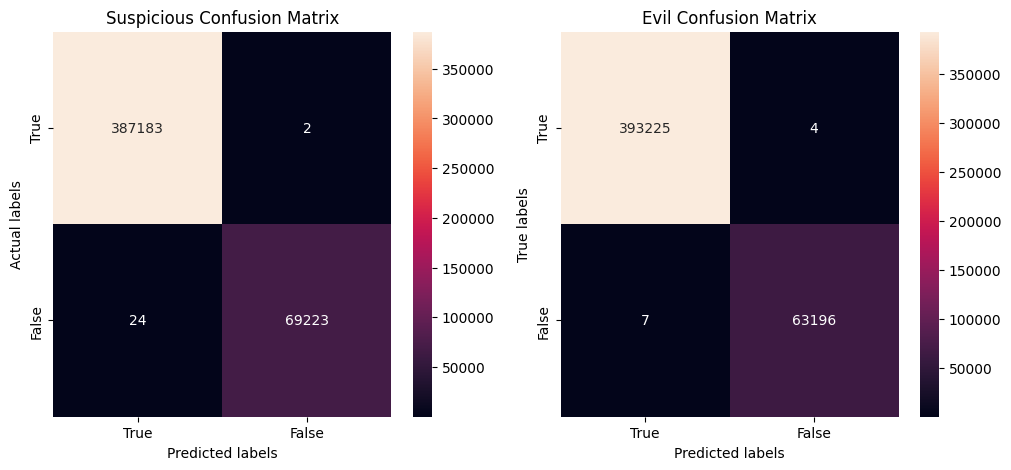

In [49]:
# Compute confusion matrices
data_cm = multilabel_confusion_matrix(data_y_test, data_y_pred)
plot_cm(data_cm)

In [50]:
precision, recall, f_score, support = precision_recall_fscore_support(data_y_test, data_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 1.0000 	precision evil:	 0.9999
recall sus:	 0.9997 	recall evil:	 0.9999
f_score sus:	 0.9998 	f_score evil:	 0.9999


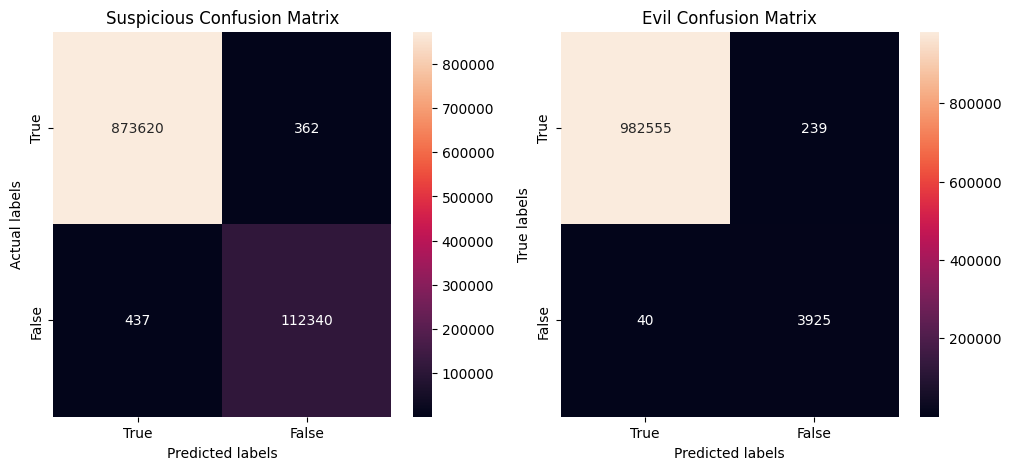

In [51]:
ip_cm = multilabel_confusion_matrix(ip_y_test, ip_y_pred)
plot_cm(ip_cm)

In [52]:
precision, recall, f_score, support = precision_recall_fscore_support(ip_y_test, ip_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 0.9968 	precision evil:	 0.9426
recall sus:	 0.9961 	recall evil:	 0.9899
f_score sus:	 0.9965 	f_score evil:	 0.9657


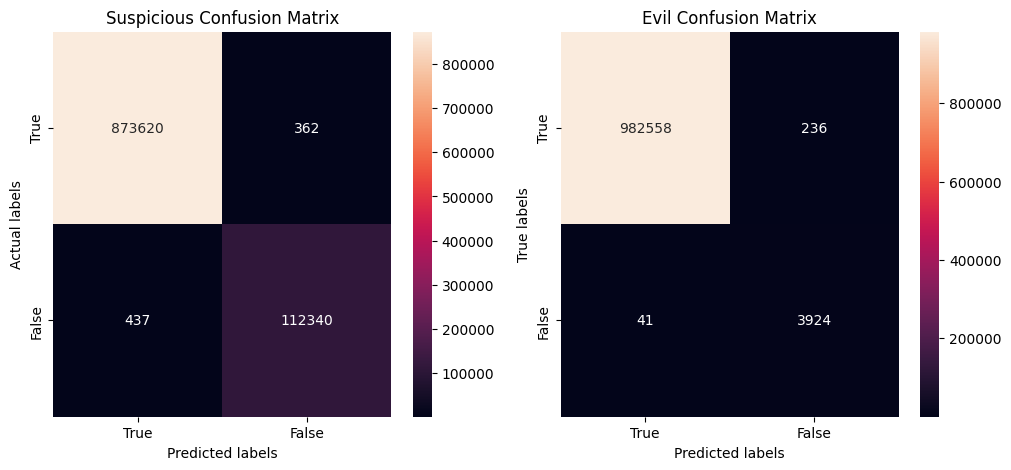

In [53]:
dns_cm = multilabel_confusion_matrix(dns_y_test, dns_y_pred)
plot_cm(dns_cm)

In [54]:
precision, recall, f_score, support = precision_recall_fscore_support(dns_y_test, dns_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 0.9968 	precision evil:	 0.9433
recall sus:	 0.9961 	recall evil:	 0.9897
f_score sus:	 0.9965 	f_score evil:	 0.9659


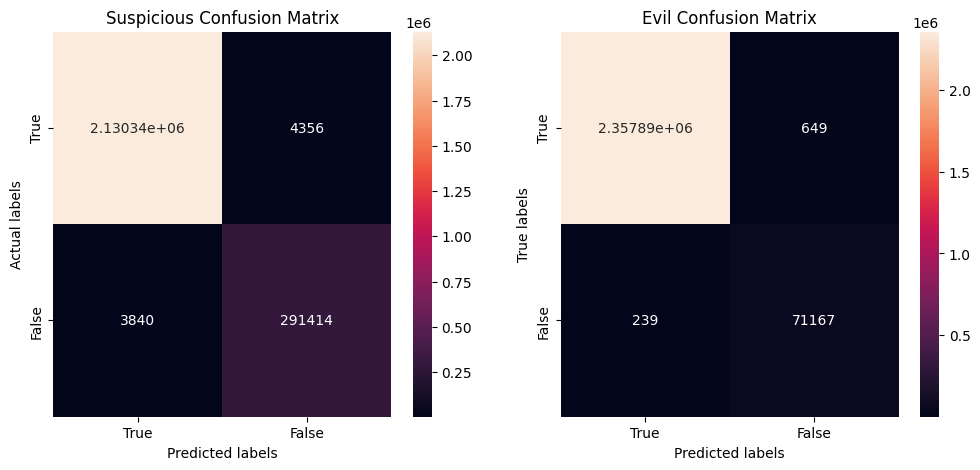

In [55]:
combined_cm = multilabel_confusion_matrix(combined_y_test, combined_y_pred)
plot_cm(combined_cm)

In [56]:
precision, recall, f_score, support = precision_recall_fscore_support(combined_y_test, combined_y_pred, average=None)
print_scores(precision,recall,f_score)

precision sus:	 0.9853 	precision evil:	 0.9910
recall sus:	 0.9870 	recall evil:	 0.9967
f_score sus:	 0.9861 	f_score evil:	 0.9938


# Conclusion

In conclusion, after conducting model selection, fine-tuning, and consolidating various sensor logs, the Decision Tree classifier emerged as the best-fitting model for the BETH dataset in the context of anomaly detection in cybersecurity. The evaluation of multiple default models initially provided a foundation for comparison, and subsequent fine-tuning further optimized the Decision Tree model's performance.

The refined Decision Tree classifier, after incorporating the insights gained from the data processing steps, demonstrated exceptional precision rates. Specifically, it achieved a remarkable precision of 98.5% on the 'suspicious' label, indicating its ability to accurately identify instances that exhibited potentially suspicious behavior. Additionally, the model achieved an impressive precision of 99.1% on the 'evil' label, effectively capturing instances associated with malicious activities.

Furthermore, our decision tree classifier demonstrated outstanding recall values, capturing a significant proportion of relevant instances. On the 'suspicious' label, the classifier achieved a recall of 98.7%, ensuring that it can effectively identify a vast majority of instances that truly represent suspicious behavior. Similarly, the recall on the 'evil' label reached an impressive 99.7%, ensuring minimal false negatives and highlighting the classifier's capability in detecting instances related to highly malicious activities.

The f-scores, which provide a balanced measure of precision and recall, further emphasize the effectiveness of our decision tree classifier. With an f-score of 98.6% on the 'suspicious' label and an exceptional f-score of 99.4% on the 'evil' label, our model demonstrates robust performance in accurately identifying anomalies and potential threats within the cybersecurity dataset.

These exceptional performance metrics underscore the suitability and effectiveness of the decision tree classifier in detecting anomalies within the BETH dataset. By achieving high precision, recall, and f-scores on both the 'suspicious' and 'evil' labels, our model provides a strong foundation for enhancing cybersecurity measures and mitigating potential threats.

However, it's essential to acknowledge the limitations of our study. The performance of the decision tree classifier and the reported metrics heavily relies on the quality and representativeness of the BETH dataset. Furthermore, as the cybersecurity landscape continually evolves, it is crucial to regularly update and adapt the model to address emerging threats and challenges.

Further research and experimentation could explore additional refinements, such as ensemble techniques or incorporating other advanced machine learning algorithms, to further improve the performance of the Decision Tree model and advance anomaly detection capabilities in cybersecurity using the BETH dataset.

# References

[1] C. Wiens, “What is anomaly detection in cybersecurity?,” Security Boulevard, https://securityboulevard.com/2021/07/what-is-anomaly-detection-in-cybersecurity/ (accessed Jun. 30, 2023). 

[2] K. Highnam, K. Arulkumaran, Z. Hanif, and N. R. Jennings, “Beth Dataset: Real cybersecurity data for Anomaly Detection Research - UCL,” BETH Dataset: Real Cybersecurity Data for Anomaly Detection Research, http://www.gatsby.ucl.ac.uk/~balaji/udl2021/accepted-papers/UDL2021-paper-033.pdf (accessed Jun. 20, 2023). 